In [91]:
from google.colab import files
uploaded = files.upload()

Saving USD_PKR Historical Data.csv to USD_PKR Historical Data (1).csv


In [100]:
# Dataset is now stored in a Pandas Dataframe

import pandas as pd
import io
df2 = pd.read_csv(io.BytesIO(uploaded['USD_PKR Historical Data.csv']))
print(df2)

              Date    Price     Open     High     Low Change %
0     Jan 01, 2020  154.870  154.870  155.270  154.87   -0.08%
1     Dec 31, 2019  155.000  154.970  155.410  154.97    0.03%
2     Dec 30, 2019  154.950  154.430  155.340  154.43    0.06%
3     Dec 28, 2019  154.850  154.850  154.850  154.85    0.00%
4     Dec 27, 2019  154.850  155.480  155.900  154.80    0.08%
...            ...      ...      ...      ...     ...      ...
4436  Jan 07, 2005   59.600   59.550   59.610   59.52   -0.03%
4437  Jan 06, 2005   59.620   59.550   59.640   59.54    0.03%
4438  Jan 05, 2005   59.605   59.560   59.605   59.53    0.09%
4439  Jan 04, 2005   59.550   59.485   59.675   59.40    0.15%
4440  Jan 03, 2005   59.460   59.410   59.540   59.40    0.06%

[4441 rows x 6 columns]


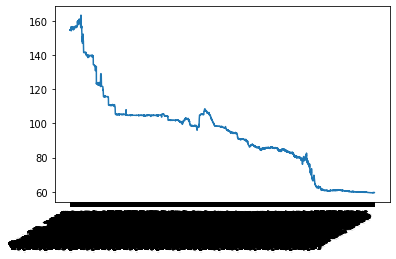

In [101]:
import matplotlib.pyplot as plt
from datetime import datetime
import csv
import matplotlib.dates as mdates

x = df2['Date']
y = df2['Price']

#plt.figure(figsize=(50, 10))
plt.plot(x,y)
plt.gcf().autofmt_xdate()

plt.show()

In [102]:
#importing useful libraries
import numpy as np
import math
import keras
from keras.models import Sequential
from keras.layers import Dense
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

In [103]:
# fixing random seed for reproducibility
np.random.seed(7)


In [104]:
# loading the dataset
df = df2['Price']
data_set = df.values
data_set = data_set.astype('float32')

In [105]:
# normalizing the dataset using the MinMaxScaler preprocessing class from the scikit-learn library
dataset = np.array(data_set).reshape(-1,1)
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)

In [106]:
# spliting dataset into train and test sets
train_size = int(len(dataset) * 0.80)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
print(len(train), len(test))

3552 889


In [107]:
# converting an array of values into a dataset matrix
def create_dataset(dataset, look_back):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset[i + look_back, 0])
	return np.array(dataX), np.array(dataY)

In [108]:
# using the function to prepare the train and test datasets for modeling (reshape into X(t-5),X(t-4),X(t-3),X(t-2),X(t-1),Y(t))
look_back = 5
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

In [109]:
# reshaping input X to be [samples, time steps, features]
trainX = np.reshape(trainX, (trainX.shape[0], 1,trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1,testX.shape[1]))

In [124]:
print(trainX.shape)
print(testX.shape)

(3546, 1, 5)
(883, 1, 5)


In [126]:
from keras.layers import SimpleRNN

In [129]:
from tensorflow.keras import layers

model = keras.Sequential()
model.add(layers.SimpleRNN(100, input_shape=(1, look_back)))
model.add(Dense(1))
model.summary()

Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_12 (SimpleRNN)    (None, 100)               10600     
_________________________________________________________________
dense_12 (Dense)             (None, 1)                 101       
Total params: 10,701
Trainable params: 10,701
Non-trainable params: 0
_________________________________________________________________


In [130]:
model.compile(loss='mean_squared_error', optimizer='adam')
# training
model.fit(trainX, trainY, epochs=50, batch_size=1, verbose=2)

Epoch 1/50
3546/3546 - 6s - loss: 0.0022
Epoch 2/50
3546/3546 - 4s - loss: 2.5658e-04
Epoch 3/50
3546/3546 - 4s - loss: 1.4707e-04
Epoch 4/50
3546/3546 - 4s - loss: 1.1665e-04
Epoch 5/50
3546/3546 - 4s - loss: 1.0583e-04
Epoch 6/50
3546/3546 - 4s - loss: 8.5962e-05
Epoch 7/50
3546/3546 - 4s - loss: 8.2098e-05
Epoch 8/50
3546/3546 - 4s - loss: 8.0936e-05
Epoch 9/50
3546/3546 - 4s - loss: 7.0319e-05
Epoch 10/50
3546/3546 - 4s - loss: 6.7096e-05
Epoch 11/50
3546/3546 - 4s - loss: 6.6438e-05
Epoch 12/50
3546/3546 - 4s - loss: 6.2680e-05
Epoch 13/50
3546/3546 - 4s - loss: 6.2174e-05
Epoch 14/50
3546/3546 - 4s - loss: 5.6678e-05
Epoch 15/50
3546/3546 - 4s - loss: 6.3661e-05
Epoch 16/50
3546/3546 - 4s - loss: 5.6745e-05
Epoch 17/50
3546/3546 - 4s - loss: 5.6246e-05
Epoch 18/50
3546/3546 - 4s - loss: 6.1885e-05
Epoch 19/50
3546/3546 - 4s - loss: 5.1332e-05
Epoch 20/50
3546/3546 - 4s - loss: 5.4735e-05
Epoch 21/50
3546/3546 - 4s - loss: 5.3804e-05
Epoch 22/50
3546/3546 - 4s - loss: 5.4338e-05
E

In [136]:
#Prediction using the trained model
scaler.scale_

y_pred = model.predict(testX)
# inverting predictions
y_pred = scaler.inverse_transform(y_pred)
# printing predicted prices
print(y_pred[:5])

[[67.62211]
 [68.47694]
 [68.78694]
 [69.22026]
 [68.31087]]


In [137]:
# printing original prices
y_test = np.array(testY).reshape(-1,1)
# for un-normalizing
y_test = scaler.inverse_transform(y_test)
print(y_test[:5])

[[69.27]
 [69.31]
 [69.65]
 [68.45]
 [68.5 ]]


In [138]:
#Mean Squared Error
mean_squared_error(y_test,y_pred)

0.79199135

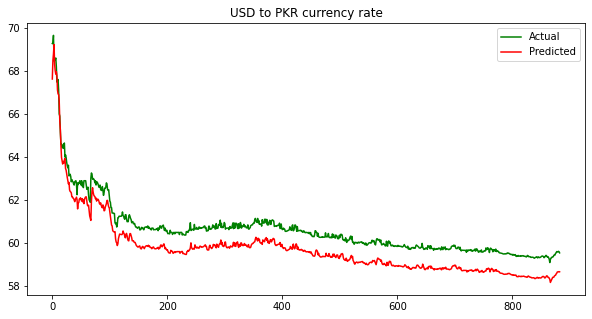

In [139]:
#Visualizing the results
plt.figure(figsize=(10,5))
plt.title('USD to PKR currency rate')
plt.plot(y_test , label = 'Actual', color = 'g')
plt.plot(y_pred , label = 'Predicted', color = 'r')
plt.legend()